In [1]:
from collections import Counter, defaultdict
from functools import partial, reduce
from sm.linear_algebra import shape
from sm.linear_algebra import shape, get_row, get_column, make_matrix, \
    vector_mean, vector_sum, dot, magnitude, vector_subtract, scalar_multiply


In [2]:
from sm.probability import inverse_normal_cdf
from sm.gradient_descent import maximize_batch
import math, random, csv
import matplotlib.pyplot as plt
import dateutil.parser

In [3]:
import matplotlib.pyplot as plt

In [4]:
# from stats import correlation, standard_deviation, mean

In [5]:
def bucketize(point, bucket_size):
    """floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

In [6]:
def make_histogram(points, bucket_size):
    """buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

In [7]:
def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

In [8]:
random.seed(0)

In [24]:
#uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

In [25]:
uniform

[-55.8683156355025,
 42.076949312061885,
 -15.776825728636751,
 -65.70970627554051,
 -59.160916493914016,
 -48.41421158941355,
 -62.21919251300201,
 -76.79765620146037,
 -80.45422441419066,
 70.02860662816207,
 -8.555158108367038,
 -38.41226962280211,
 70.65467948441105,
 -27.684805802073953,
 -79.50910395632832,
 88.29629637175103,
 -2.151456782744063,
 -36.930733970892106,
 -85.90470975006666,
 58.77384194598176,
 61.60566911903763,
 96.57829778604233,
 88.81767578150573,
 -6.637199450560701,
 -32.808426103057826,
 -29.60036282638842,
 46.46681816890802,
 -62.582362720802934,
 -24.827779642508858,
 -75.29686106665903,
 -54.844673657029496,
 61.65656363489259,
 -66.20482157957147,
 -15.164442292929792,
 -4.4394306858416,
 21.727034181372318,
 -68.64033677187498,
 32.930190599669515,
 96.03679417816099,
 40.5782689760218,
 13.5492874573998,
 3.0805137200651274,
 -87.04205774926427,
 84.16088799766521,
 70.63138131686893,
 -94.77725059101762,
 -64.62968522640469,
 61.42925700040436,
 26

In [26]:
# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]

In [27]:
normal

[11.182279586791992,
 -90.14805793762207,
 57.00728416442871,
 62.33559608459473,
 -18.954591751098633,
 105.57526588439941,
 -16.88349723815918,
 22.653207778930664,
 113.32148551940918,
 -124.38471794128418,
 -89.99476432800293,
 -50.269975662231445,
 7.963113784790039,
 89.5664119720459,
 24.616670608520508,
 9.909181594848633,
 68.19771766662598,
 155.52180290222168,
 -2.933778762817383,
 -30.27766227722168,
 14.982004165649414,
 -42.3574161529541,
 -70.77761650085449,
 79.94044303894043,
 10.292959213256836,
 -27.365083694458008,
 -25.08742332458496,
 -48.64354133605957,
 -59.04685020446777,
 -149.15196418762207,
 -31.01912498474121,
 -22.40859031677246,
 79.03372764587402,
 -45.3830623626709,
 -4.085111618041992,
 -32.5107479095459,
 76.5897274017334,
 -102.55722999572754,
 -17.013959884643555,
 4.198179244995117,
 65.52432060241699,
 -1.135568618774414,
 1.525869369506836,
 -158.39741706848145,
 -32.854299545288086,
 49.69485282897949,
 -100.9416675567627,
 -4.746122360229492,
 

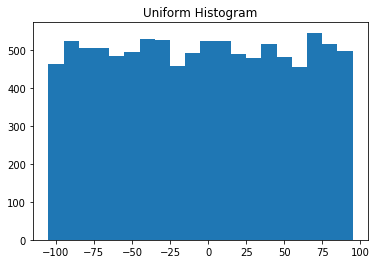

In [28]:
plot_histogram(uniform, 10, "Uniform Histogram")

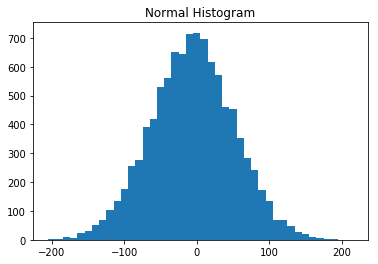

In [29]:
plot_histogram(normal, 10, "Normal Histogram")

In [10]:
def compare_two_distributions():

    random.seed(0)

    uniform = [random.randrange(-100,101) for _ in range(200)]
    normal = [57 * inverse_normal_cdf(random.random())
              for _ in range(200)]

    plot_histogram(uniform, 10, "Uniform Histogram")
    plot_histogram(normal, 10, "Normal Histogram")

In [11]:
def random_normal():
    """returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

In [12]:
xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

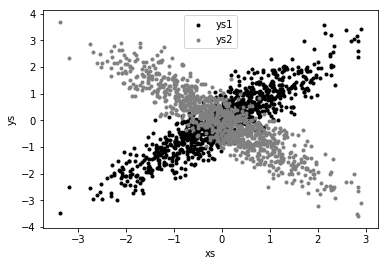

In [30]:
    plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
    plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
    plt.xlabel('xs')
    plt.ylabel('ys')
    plt.legend(loc=9)
    plt.show()

In [33]:
import numpy as np

In [35]:
np.correlate(xs, ys1)

array([1013.17461113])

In [38]:
np.corrcoef(xs, ys1)

array([[1.        , 0.89736008],
       [0.89736008, 1.        ]])

In [39]:
np.corrcoef(xs, ys2)

array([[ 1.        , -0.89589693],
       [-0.89589693,  1.        ]])

In [14]:
def scatter():
    plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
    plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
    plt.xlabel('xs')
    plt.ylabel('ys')
    plt.legend(loc=9)
    plt.show()

In [15]:
def correlation_matrix(data):
    """returns the num_columns x num_columns matrix whose (i, j)th entry
    is the correlation between columns i and j of data"""

    _, num_columns = shape(data)

    def matrix_entry(i, j):
        return correlation(get_column(data, i), get_column(data, j))

    return make_matrix(num_columns, num_columns, matrix_entry)

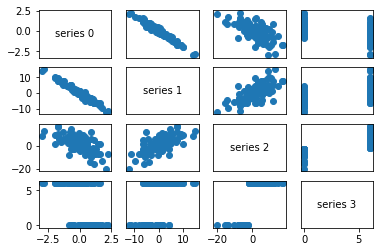

In [16]:
    # first, generate some random data

    num_points = 100

    def random_row():
        row = [None, None, None, None]
        row[0] = random_normal()
        row[1] = -5 * row[0] + random_normal()
        row[2] = row[0] + row[1] + 5 * random_normal()
        row[3] = 6 if row[2] > -2 else 0
        return row
    random.seed(0)
    data = [random_row()
            for _ in range(num_points)]

    # then plot it

    _, num_columns = shape(data)
    fig, ax = plt.subplots(num_columns, num_columns)

    for i in range(num_columns):
        for j in range(num_columns):

            # scatter column_j on the x-axis vs column_i on the y-axis
            if i != j: ax[i][j].scatter(get_column(data, j), get_column(data, i))

            # unless i == j, in which case show the series name
            else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                                    xycoords='axes fraction',
                                    ha="center", va="center")

            # then hide axis labels except left and bottom charts
            if i < num_columns - 1: ax[i][j].xaxis.set_visible(False)
            if j > 0: ax[i][j].yaxis.set_visible(False)

    # fix the bottom right and top left axis labels, which are wrong because
    # their charts only have text in them
    ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
    ax[0][0].set_ylim(ax[0][1].get_ylim())

    plt.show()

In [17]:
def make_scatterplot_matrix():

    # first, generate some random data

    num_points = 100

    def random_row():
        row = [None, None, None, None]
        row[0] = random_normal()
        row[1] = -5 * row[0] + random_normal()
        row[2] = row[0] + row[1] + 5 * random_normal()
        row[3] = 6 if row[2] > -2 else 0
        return row
    random.seed(0)
    data = [random_row()
            for _ in range(num_points)]

    # then plot it

    _, num_columns = shape(data)
    fig, ax = plt.subplots(num_columns, num_columns)

    for i in range(num_columns):
        for j in range(num_columns):

            # scatter column_j on the x-axis vs column_i on the y-axis
            if i != j: ax[i][j].scatter(get_column(data, j), get_column(data, i))

            # unless i == j, in which case show the series name
            else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                                    xycoords='axes fraction',
                                    ha="center", va="center")

            # then hide axis labels except left and bottom charts
            if i < num_columns - 1: ax[i][j].xaxis.set_visible(False)
            if j > 0: ax[i][j].yaxis.set_visible(False)

    # fix the bottom right and top left axis labels, which are wrong because
    # their charts only have text in them
    ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
    ax[0][0].set_ylim(ax[0][1].get_ylim())

    plt.show()

In [18]:
def parse_row(input_row, parsers):
    """given a list of parsers (some of which may be None)
    apply the appropriate one to each element of the input_row"""
    return [parser(value) if parser is not None else value
            for value, parser in zip(input_row, parsers)]

def parse_rows_with(reader, parsers):
    """wrap a reader to apply the parsers to each of its rows"""
    for row in reader:
        yield parse_row(row, parsers)

def try_or_none(f):
    """wraps f to return None if f raises an exception
    assumes f takes only one input"""
    def f_or_none(x):
        try: return f(x)
        except: return None
    return f_or_none

def parse_row(input_row, parsers):
    return [try_or_none(parser)(value) if parser is not None else value
            for value, parser in zip(input_row, parsers)]

def try_parse_field(field_name, value, parser_dict):
    """try to parse value using the appropriate function from parser_dict"""
    parser = parser_dict.get(field_name) # None if no such entry
    if parser is not None:
        return try_or_none(parser)(value)
    else:
        return value

def parse_dict(input_dict, parser_dict):
    return { field_name : try_parse_field(field_name, value, parser_dict)
             for field_name, value in input_dict.items() }

In [19]:
def picker(field_name):
    """returns a function that picks a field out of a dict"""
    return lambda row: row[field_name]

def pluck(field_name, rows):
    """turn a list of dicts into the list of field_name values"""
    return map(picker(field_name), rows)

def group_by(grouper, rows, value_transform=None):
    # key is output of grouper, value is list of rows
    grouped = defaultdict(list)
    for row in rows:
        grouped[grouper(row)].append(row)
    if value_transform is None:
        return grouped
    else:
        return { key : value_transform(rows)
                 for key, rows in grouped.items() }

def percent_price_change(yesterday, today):
    return today["closing_price"] / yesterday["closing_price"] - 1

def day_over_day_changes(grouped_rows):
    # sort the rows by date
    ordered = sorted(grouped_rows, key=picker("date"))
    # zip with an offset to get pairs of consecutive days
    return [{ "symbol" : today["symbol"],
              "date" : today["date"],
              "change" : percent_price_change(yesterday, today) }
             for yesterday, today in zip(ordered, ordered[1:])]

In [42]:
def scale(data_matrix):
    num_rows, num_cols = shape(data_matrix)
    means = [mean(get_column(data_matrix,j))
             for j in range(num_cols)]
    stdevs = [standard_deviation(get_column(data_matrix,j))
              for j in range(num_cols)]
    return means, stdevs

In [41]:
def rescale(data_matrix):
    """rescales the input data so that each column
    has mean 0 and standard deviation 1
    ignores columns with no deviation"""
    means, stdevs = scale(data_matrix)

    def rescaled(i, j):
        if stdevs[j] > 0:
            return (data_matrix[i][j] - means[j]) / stdevs[j]
        else:
            return data_matrix[i][j]

    num_rows, num_cols = shape(data_matrix)
    return make_matrix(num_rows, num_cols, rescaled)